# Project - Image Classification Using Convolutional Neural Network (Digit Prediction)

# Read data

In [35]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as mt
A = mt.read_csv("C:/Users/SHREE/Desktop/Data/digitsnpixels.csv")

# Preview

In [40]:
A.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
A.shape

(42000, 785)

# Visualize some image by converting into 28*28

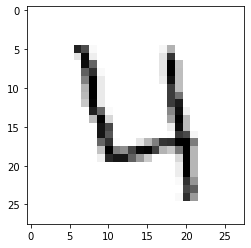

In [5]:
import matplotlib.pyplot as plt
X = A.drop("label",axis=1).values
plt.imshow(X[3:4].reshape(28,28),cmap=plt.cm.binary)

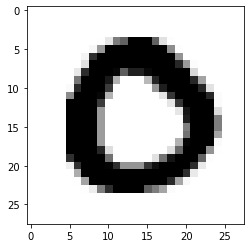

In [13]:
import matplotlib.pyplot as plt
X = A.drop("label",axis=1).values
plt.imshow(X[4:5].reshape(28,28),cmap=plt.cm.binary)

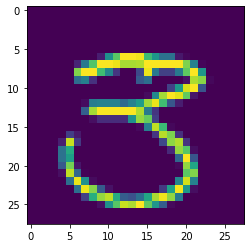

In [14]:
import matplotlib.pyplot as plt
X=A.drop(labels=['label'],axis=1).values
plt.imshow(X[7:8].reshape(28,28))

# Define Y and Convert Y into One Hot Encoding 

In [15]:
Y = A.label.values

In [16]:
Y_cat = mt.get_dummies(Y).values

In [18]:
import tensorflow as tf
#tf.keras.utils.to_categorical(Y)

# Scaling the X data

In [19]:
X_scaled = X/255

# Divide data into training and testing

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y_cat,test_size=0.2,random_state=21)

# Reshaping data

In [21]:
xtrain.shape

(33600, 784)

In [22]:
xtest.shape

(8400, 784)

In [23]:
xtrain = xtrain.reshape(33600,28,28,1)
xtest = xtest.reshape(8400,28,28,1)

# Create a Convolutional Neural Network

In [24]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,BatchNormalization,Flatten

In [25]:
nn = Sequential()

nn.add(Convolution2D(filters = 16,kernel_size = (3,3),activation="relu",input_shape=(28, 28, 1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Flatten())

nn.add(Dense(120,activation="relu"))
nn.add(Dense(10,activation="softmax"))

In [26]:
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [27]:
nn.fit(xtrain,ytrain,epochs=3,batch_size=64)

Epoch 1/3
525/525 [==============================] - 13s 23ms/step - loss: 0.1842 - accuracy: 0.9437
Epoch 2/3
525/525 [==============================] - 12s 22ms/step - loss: 0.0617 - accuracy: 0.9808
Epoch 3/3
525/525 [==============================] - 11s 21ms/step - loss: 0.0351 - accuracy: 0.9881


# Prediction on test data

In [28]:
pred_prob = nn.predict(xtest)

In [29]:
from numpy import argmax
pred = argmax(pred_prob,axis=1)

In [30]:
pred

array([1, 4, 2, ..., 0, 1, 2], dtype=int64)

In [31]:
ytest = argmax(ytest,axis=1)

In [33]:
ytest

array([1, 4, 2, ..., 0, 1, 2], dtype=int64)

# Evaluation of model

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.9839285714285714